<a href="https://colab.research.google.com/github/Ifra96/820-BDP/blob/main/BDP_Singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 28.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re
import pandas as pd
#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [ ]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving Singapore-address-.txt to Singapore-address-.txt


In [ ]:
f = open("Singapore-address-.txt", "r") #read
print(f.read())

Mr President
Secretary-General
Excellencies
Ladies and gentlemen
The world was changing even before COVID-19. Geopolitical tensions were growing; globalisation was showing fissures; isolationism, protectionism and unilateralism were pushing back against multilateral institutions and international cooperation.
The COVID-19 crisis has sharpened these trends, but it has also reminded us how inter connected and interdependent countries are, and why we all need to work together to defeat the gravest challenge of our time.
Importance of multilateralism / Role of the UN
A rules-based multilateral system, with the UN at its core, is our best hope to build a stable international environment. For all its limitations, it has helped to level the playing field for all countries. It has given small states like Singapore a voice, and a stake in the global commons. Major powers also benefit from a more peaceful and stable global environment, and when they take joint initiatives through multilateral in

In [ ]:
import pandas as pd
df = pd.read_csv("Singapore-address-.txt",delimiter="\t",header=None,names=["text"])

In [ ]:
df

,text
0,Mr President
1,Secretary-General
2,Excellencies
3,Ladies and gentlemen
4,The world was changing even before COVID-19. G...
5,The COVID-19 crisis has sharpened these trends...
6,Importance of multilateralism / Role of the UN
7,"A rules-based multilateral system, with the UN..."
8,But recent trends have also exposed shortcomin...
9,We must work together to update and reform our...


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'like', 'un','use', 'not', 'would', 'say', 'could', 'excellency', 'one','_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
stop_words.add("like")
stop_words.add("un")
stop_words.add("general")
stop_words.add("secretary")
stop_words.add("gentlemen")
stop_words.add("ladies")
stop_words.add("president")
stop_words.add("mr")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid escape sequence \W

<input>:1: DeprecationWarning:

invalid 

In [ ]:
df

,text,token,clean,stems,polarity,subjectivity
0,mr president,"[mr, president]",[],[mr],0.000000,0.000000
1,secretary general,"[secretary, general]",[],[],0.050000,0.500000
2,excellencies,[excellencies],[excellencies],[excellency],0.000000,0.000000
3,ladies and gentlemen,"[ladies, and, gentlemen]",[],[],0.000000,0.000000
4,the world was changing even before covid 19 geopolitical tensions were growing globalisation was...,"[the, world, was, changing, even, before, covid, 19, geopolitical, tensions, were, growing, glob...","[world, changing, even, covid, 19, geopolitical, tensions, growing, globalisation, showing, fiss...","[world, change, even, covid, 19, geopolitical, tension, growing, globalisation, showing, fissure...",0.033333,0.066667
5,the covid 19 crisis has sharpened these trends but it has also reminded us how inter connected a...,"[the, covid, 19, crisis, has, sharpened, these, trends, but, it, has, also, reminded, us, how, i...","[covid, 19, crisis, sharpened, trends, also, reminded, us, inter, connected, interdependent, cou...","[covid, 19, crisis, sharpen, trend, also, remind, us, inter, connect, interdependent, country, n...",0.000000,0.000000
6,importance of multilateralism role of the un,"[importance, of, multilateralism, role, of, the, un]","[importance, multilateralism, role]","[importance, multilateralism, role]",0.000000,0.000000
7,a rules based multilateral system with the un at its core is our best hope to build a stable int...,"[a, rules, based, multilateral, system, with, the, un, at, its, core, is, our, best, hope, to, b...","[rules, based, multilateral, system, core, best, hope, build, stable, international, environment...","[rule, base, multilateral, system, core, best, hope, build, stable, international, environment, ...",0.146875,0.245833
8,but recent trends have also exposed shortcomings of multilateral institutions the inability to a...,"[but, recent, trends, have, also, exposed, shortcomings, of, multilateral, institutions, the, in...","[recent, trends, also, exposed, shortcomings, multilateral, institutions, inability, achieve, co...","[recent, trend, also, expose, shortcoming, multilateral, institution, inability, achieve, consen...",0.054167,0.316667
9,we must work together to update and reform our multilateral institutions including the un to kee...,"[we, must, work, together, to, update, and, reform, our, multilateral, institutions, including, ...","[must, work, together, update, reform, multilateral, institutions, including, keep, institutions...","[must, work, together, update, reform, multilateral, institution, include, keep, institution, op...",0.176190,0.459524


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,text,token,clean,stems,polarity,subjectivity
0,mr president,"[mr, president]",[],[],0.000000,0.000000
1,secretary general,"[secretary, general]",[],[],0.050000,0.500000
2,excellencies,[excellencies],[excellencies],[excellency],0.000000,0.000000
3,ladies and gentlemen,"[ladies, and, gentlemen]",[],[],0.000000,0.000000
4,the world was changing even before covid 19 geopolitical tensions were growing globalisation was...,"[the, world, was, changing, even, before, covid, 19, geopolitical, tensions, were, growing, glob...","[world, changing, even, covid, 19, geopolitical, tensions, growing, globalisation, showing, fiss...","[world, change, even, covid, 19, geopolitical, tension, growing, globalisation, showing, fissure...",0.033333,0.066667
5,the covid 19 crisis has sharpened these trends but it has also reminded us how inter connected a...,"[the, covid, 19, crisis, has, sharpened, these, trends, but, it, has, also, reminded, us, how, i...","[covid, 19, crisis, sharpened, trends, also, reminded, us, inter, connected, interdependent, cou...","[covid, 19, crisis, sharpen, trend, also, remind, us, inter, connect, interdependent, country, n...",0.000000,0.000000
6,importance of multilateralism role of the un,"[importance, of, multilateralism, role, of, the, un]","[importance, multilateralism, role]","[importance, multilateralism, role]",0.000000,0.000000
7,a rules based multilateral system with the un at its core is our best hope to build a stable int...,"[a, rules, based, multilateral, system, with, the, un, at, its, core, is, our, best, hope, to, b...","[rules, based, multilateral, system, core, best, hope, build, stable, international, environment...","[rule, base, multilateral, system, core, best, hope, build, stable, international, environment, ...",0.146875,0.245833
8,but recent trends have also exposed shortcomings of multilateral institutions the inability to a...,"[but, recent, trends, have, also, exposed, shortcomings, of, multilateral, institutions, the, in...","[recent, trends, also, exposed, shortcomings, multilateral, institutions, inability, achieve, co...","[recent, trend, also, expose, shortcoming, multilateral, institution, inability, achieve, consen...",0.054167,0.316667
9,we must work together to update and reform our multilateral institutions including the un to kee...,"[we, must, work, together, to, update, and, reform, our, multilateral, institutions, including, ...","[must, work, together, update, reform, multilateral, institutions, including, keep, institutions...","[must, work, together, update, reform, multilateral, institution, include, keep, institution, op...",0.176190,0.459524


In [ ]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt##


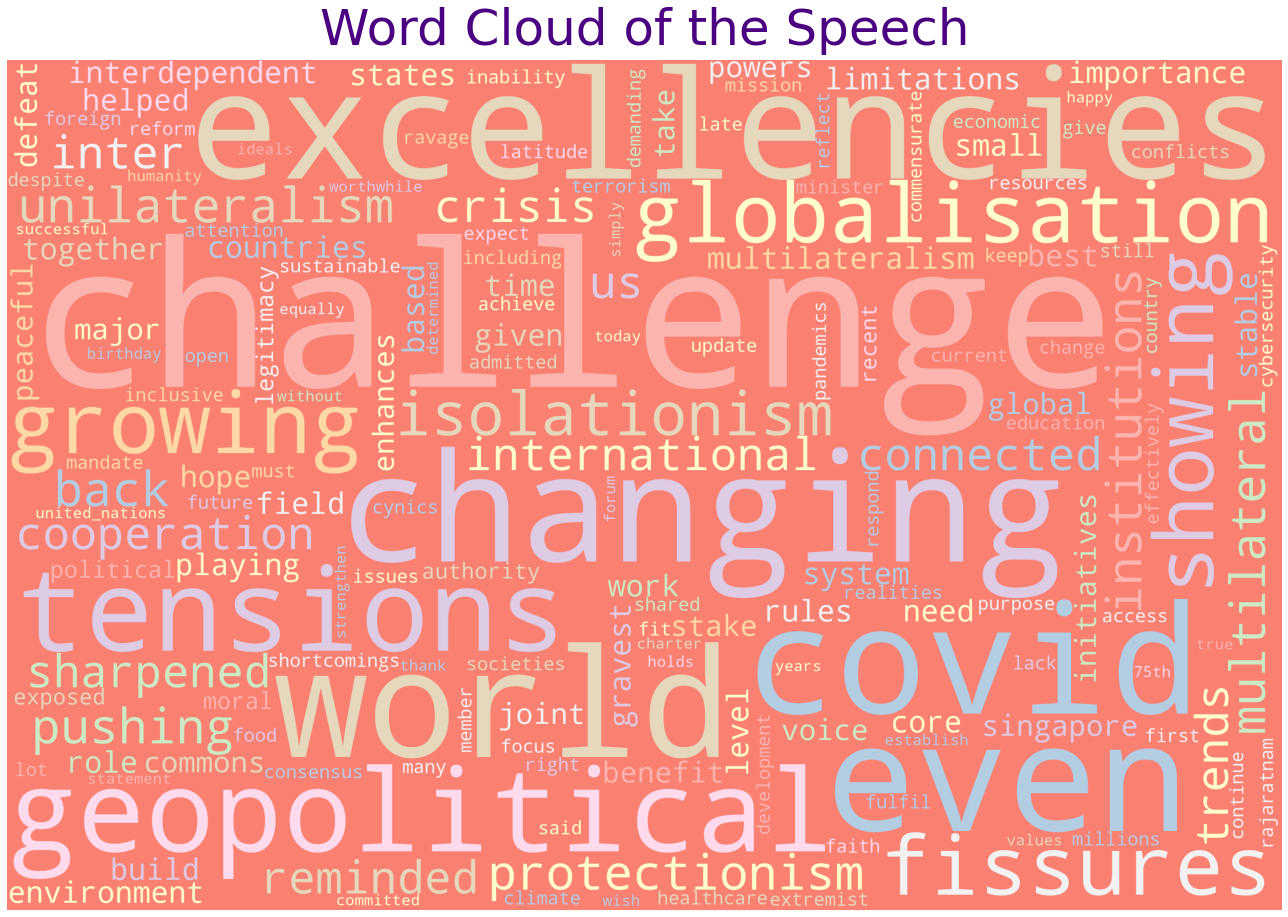

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)
plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)
plt.savefig('plot_wordcloud', dpi = 300, bbox_inches = 'tight')



In [ ]:
text_data = list(df['clean'])

In [ ]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(text_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.014*"covid" + 0.014*"19" + 0.014*"international" + 0.014*"protectionism" + 0.014*"isolationism" + 0.014*"back" + 0.014*"pushing" + 0.014*"tensions" + 0.014*"geopolitical" + 0.014*"changing"'), (1, '0.050*"future" + 0.033*"many" + 0.033*"singapore" + 0.017*"foreign" + 0.017*"first" + 0.017*"rajaratnam" + 0.017*"minister" + 0.017*"late" + 0.017*"humanity" + 0.017*"holds"'), (2, '0.014*"shortcomings" + 0.014*"still" + 0.014*"trends" + 0.014*"major" + 0.014*"also" + 0.014*"conflicts" + 0.014*"access" + 0.014*"continue" + 0.014*"recent" + 0.014*"exposed"'), (3, '0.041*"including" + 0.041*"states" + 0.041*"work" + 0.041*"countries" + 0.019*"helped" + 0.019*"small" + 0.015*"institutions" + 0.015*"multilateral" + 0.011*"political" + 0.011*"environment"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
import gensim # Print the Keyword in the 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

(0, '0.006*"stable" + 0.006*"multilateral" + 0.006*"environment" + 0.006*"global" + 0.006*"political" + 0.006*"helped" + 0.006*"benefit" + 0.006*"small" + 0.006*"playing" + 0.006*"moral"')
(1, '0.035*"environment" + 0.035*"global" + 0.035*"stable" + 0.035*"multilateral" + 0.018*"take" + 0.018*"given" + 0.018*"authority" + 0.018*"peaceful" + 0.018*"best" + 0.018*"also"')
(2, '0.061*"excellencies" + 0.006*"multilateralism" + 0.006*"importance" + 0.006*"role" + 0.006*"challenge" + 0.006*"tensions" + 0.006*"major" + 0.006*"time" + 0.006*"also" + 0.006*"19"')
(3, '0.029*"shortcomings" + 0.029*"still" + 0.029*"future" + 0.015*"inability" + 0.015*"issues" + 0.015*"recent" + 0.015*"ravage" + 0.015*"millions" + 0.015*"lack" + 0.015*"societies"')
(4, '0.033*"institutions" + 0.033*"including" + 0.017*"political" + 0.017*"reflect" + 0.017*"mission" + 0.017*"must" + 0.017*"open" + 0.017*"pandemics" + 0.017*"purpose" + 0.017*"mandate"')
(5, '0.026*"singapore" + 0.026*"many" + 0.026*"helped" + 0.026*

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.2500,"covid, 19, international, protectionism, isolationism, back, pushing, tensions, geopolitical, ch...",[]
1,1,0.0,0.2500,"covid, 19, international, protectionism, isolationism, back, pushing, tensions, geopolitical, ch...",[]
2,2,1.0,0.6203,"future, many, singapore, foreign, first, rajaratnam, minister, late, humanity, holds",[excellencies]
3,3,0.0,0.2500,"covid, 19, international, protectionism, isolationism, back, pushing, tensions, geopolitical, ch...",[]
4,4,0.0,0.9640,"covid, 19, international, protectionism, isolationism, back, pushing, tensions, geopolitical, ch...","[world, changing, even, covid, 19, geopolitical, tensions, growing, globalisation, showing, fiss..."
5,5,3.0,0.9621,"including, states, work, countries, helped, small, institutions, multilateral, political, enviro...","[covid, 19, crisis, sharpened, trends, also, reminded, us, inter, connected, interdependent, cou..."
6,6,1.0,0.8106,"future, many, singapore, foreign, first, rajaratnam, minister, late, humanity, holds","[importance, multilateralism, role]"
7,7,3.0,0.9828,"including, states, work, countries, helped, small, institutions, multilateral, political, enviro...","[rules, based, multilateral, system, core, best, hope, build, stable, international, environment..."
8,8,2.0,0.9683,"shortcomings, still, trends, major, also, conflicts, access, continue, recent, exposed","[recent, trends, also, exposed, shortcomings, multilateral, institutions, inability, achieve, co..."
9,9,3.0,0.9840,"including, states, work, countries, helped, small, institutions, multilateral, political, enviro...","[must, work, together, update, reform, multilateral, institutions, including, keep, institutions..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9640,"covid, 19, international, protectionism, isolationism, back, pushing, tensions, geopolitical, ch...","[world, changing, even, covid, 19, geopolitical, tensions, growing, globalisation, showing, fiss..."
1,1.0,0.9750,"future, many, singapore, foreign, first, rajaratnam, minister, late, humanity, holds","[singapore, admitted, 1965, first, foreign, minister, late, rajaratnam, said, despite, cynics, f..."
2,2.0,0.9683,"shortcomings, still, trends, major, also, conflicts, access, continue, recent, exposed","[recent, trends, also, exposed, shortcomings, multilateral, institutions, inability, achieve, co..."
3,3.0,0.9840,"including, states, work, countries, helped, small, institutions, multilateral, political, enviro...","[must, work, together, update, reform, multilateral, institutions, including, keep, institutions..."


In [ ]:
pip install pyLDAvis #using plydavis to interpret topics

In [ ]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)



/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus

In [ ]:
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.8917430564168445


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    ss = TextBlob(text).sentiment.polarity
    return ss

def analyze_subjectivity(text):
    ss = TextBlob(text).sentiment.subjectivity
    return ss

In [ ]:
df['polarity'] = np.array([ analyze_sentiment(text) for text in df['text'] ])
df['subjectivity'] = np.array([ analyze_subjectivity(text) for text in df['text'] ])
df.head()

,text,token,clean,stems,polarity,subjectivity
0,mr president,"[mr, president]",[],[],0.000000,0.000000
1,secretary general,"[secretary, general]",[],[],0.050000,0.500000
2,excellencies,[excellencies],[excellencies],[excellency],0.000000,0.000000
3,ladies and gentlemen,"[ladies, and, gentlemen]",[],[],0.000000,0.000000
4,the world was changing even before covid 19 geopolitical tensions were growing globalisation was...,"[the, world, was, changing, even, before, covid, 19, geopolitical, tensions, were, growing, glob...","[world, changing, even, covid, 19, geopolitical, tensions, growing, globalisation, showing, fiss...","[world, change, even, covid, 19, geopolitical, tension, growing, globalisation, showing, fissure...",0.033333,0.066667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc727b2f990>]],
      dtype=object)

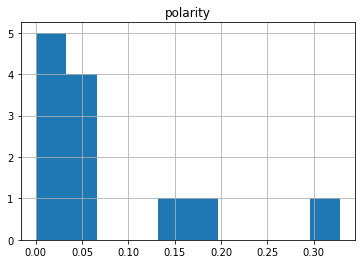

In [ ]:
df.hist(column='polarity')

In [ ]:
df["polarity"].mean()

0.0696965939153439

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc726114810>]],
      dtype=object)

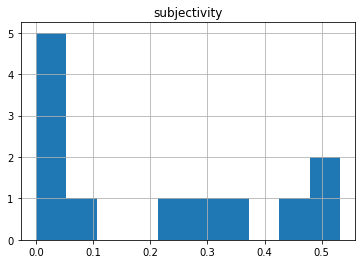

In [ ]:
df.hist(column='subjectivity')

In [ ]:
df["subjectivity"].mean()

0.20743496472663137

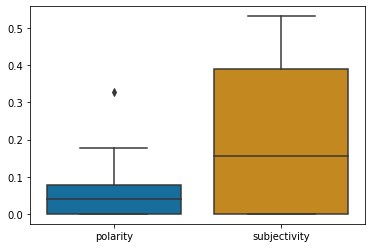

In [ ]:
import seaborn as sns
sns.boxplot(data = df,palette="colorblind")